From the model iterations, we have selected the following KNN model considering the highest accuracy shown in cross validation.

K value = 10

Selected Features
* number_words_female
* umber_of_words_lead
* difference_in_words_lead_and_co_lead
* number_of_male_actors
* number_of_female_actors
* number_words_male
* mean_age_female
* age_lead
* age_co_lead

#### IMPORTS

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

#### LOADING DATA

In [2]:
# Loading the train.csv as the main dataset
data = pd.read_csv("../data/train.csv")

# Column Transformation to lowercase and underscored spaces
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '_')
data.columns = data.columns.str.lower()

X = data.loc[:, data.columns != 'lead']
y = data.loc[:, data.columns == 'lead']

#### SPLITTING DATA

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4045)
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(779, 13), (260, 13), (779, 1), (260, 1)]

#### BUILD PIPELINE

In this section we have built a pipeline to fit a KNN model for our training dataset and produce the training and testing accuracies. Within the pipeline we are using **SandardScaler** to scale our training data and then use **KNeighborsClassifier** to fitting and prediction. The output will be in the following format.

Train Accuracy: XXXX
Test Accuracy: XXXX

In [4]:
pipe = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors = 10)
)

"""all_features = [
        'number_words_female',
        'total_words',
        'number_of_words_lead',
        'difference_in_words_lead_and_co_lead',
        'number_of_male_actors',
        'year',
        'number_of_female_actors',
        'number_words_male',
        'gross',
        'mean_age_male',
        'mean_age_female',
        'age_lead',
        'age_co_lead'
    ]"""

selected_features = [
        'number_words_female',
        'number_of_words_lead',
        'difference_in_words_lead_and_co_lead',
        'number_of_male_actors',
        'number_of_female_actors',
        'number_words_male',
        'mean_age_male',
        'age_lead',
        'age_co_lead'
    ]

pipe.fit(X_train[selected_features], y_train.to_numpy().reshape(-1, ))


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=10))])

#### METRICS

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# y_train_true = y_train["lead"].map({'Male': 1, 'Female': 0})
# y_train_pred = [1 if pred == "Male" else 0 for pred in pipe.predict(X_train[selected_features])]

# recall_score(y_train_true, y_train_pred)

print('TRAINING SET METRICS:')
print('Accuracy:', accuracy_score(y_train["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_train[selected_features])]))
print('Precision:', precision_score(y_train["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_train[selected_features])]))
print('Recall:', recall_score(y_train["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_train[selected_features])]))
print('F1:', f1_score(y_train["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_train[selected_features])]))
print('\n')

print('TESTING SET METRICS:')
print('Accuracy:', accuracy_score(y_test["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_test[selected_features])]))
print('Precision:', precision_score(y_test["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_test[selected_features])]))
print('Recall:', recall_score(y_test["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_test[selected_features])]))
print('F1:', f1_score(y_test["lead"].map({'Male': 1, 'Female': 0}), [1 if pred == "Male" else 0 for pred in pipe.predict(X_test[selected_features])]))

TRAINING SET METRICS:
Accuracy: 0.8446726572528883
Precision: 0.849478390461997
Recall: 0.9661016949152542
F1: 0.9040444091990484


TESTING SET METRICS:
Accuracy: 0.823076923076923
Precision: 0.8340807174887892
Recall: 0.9538461538461539
F1: 0.8899521531100479


#### PERMUTATION IMPORTANCE

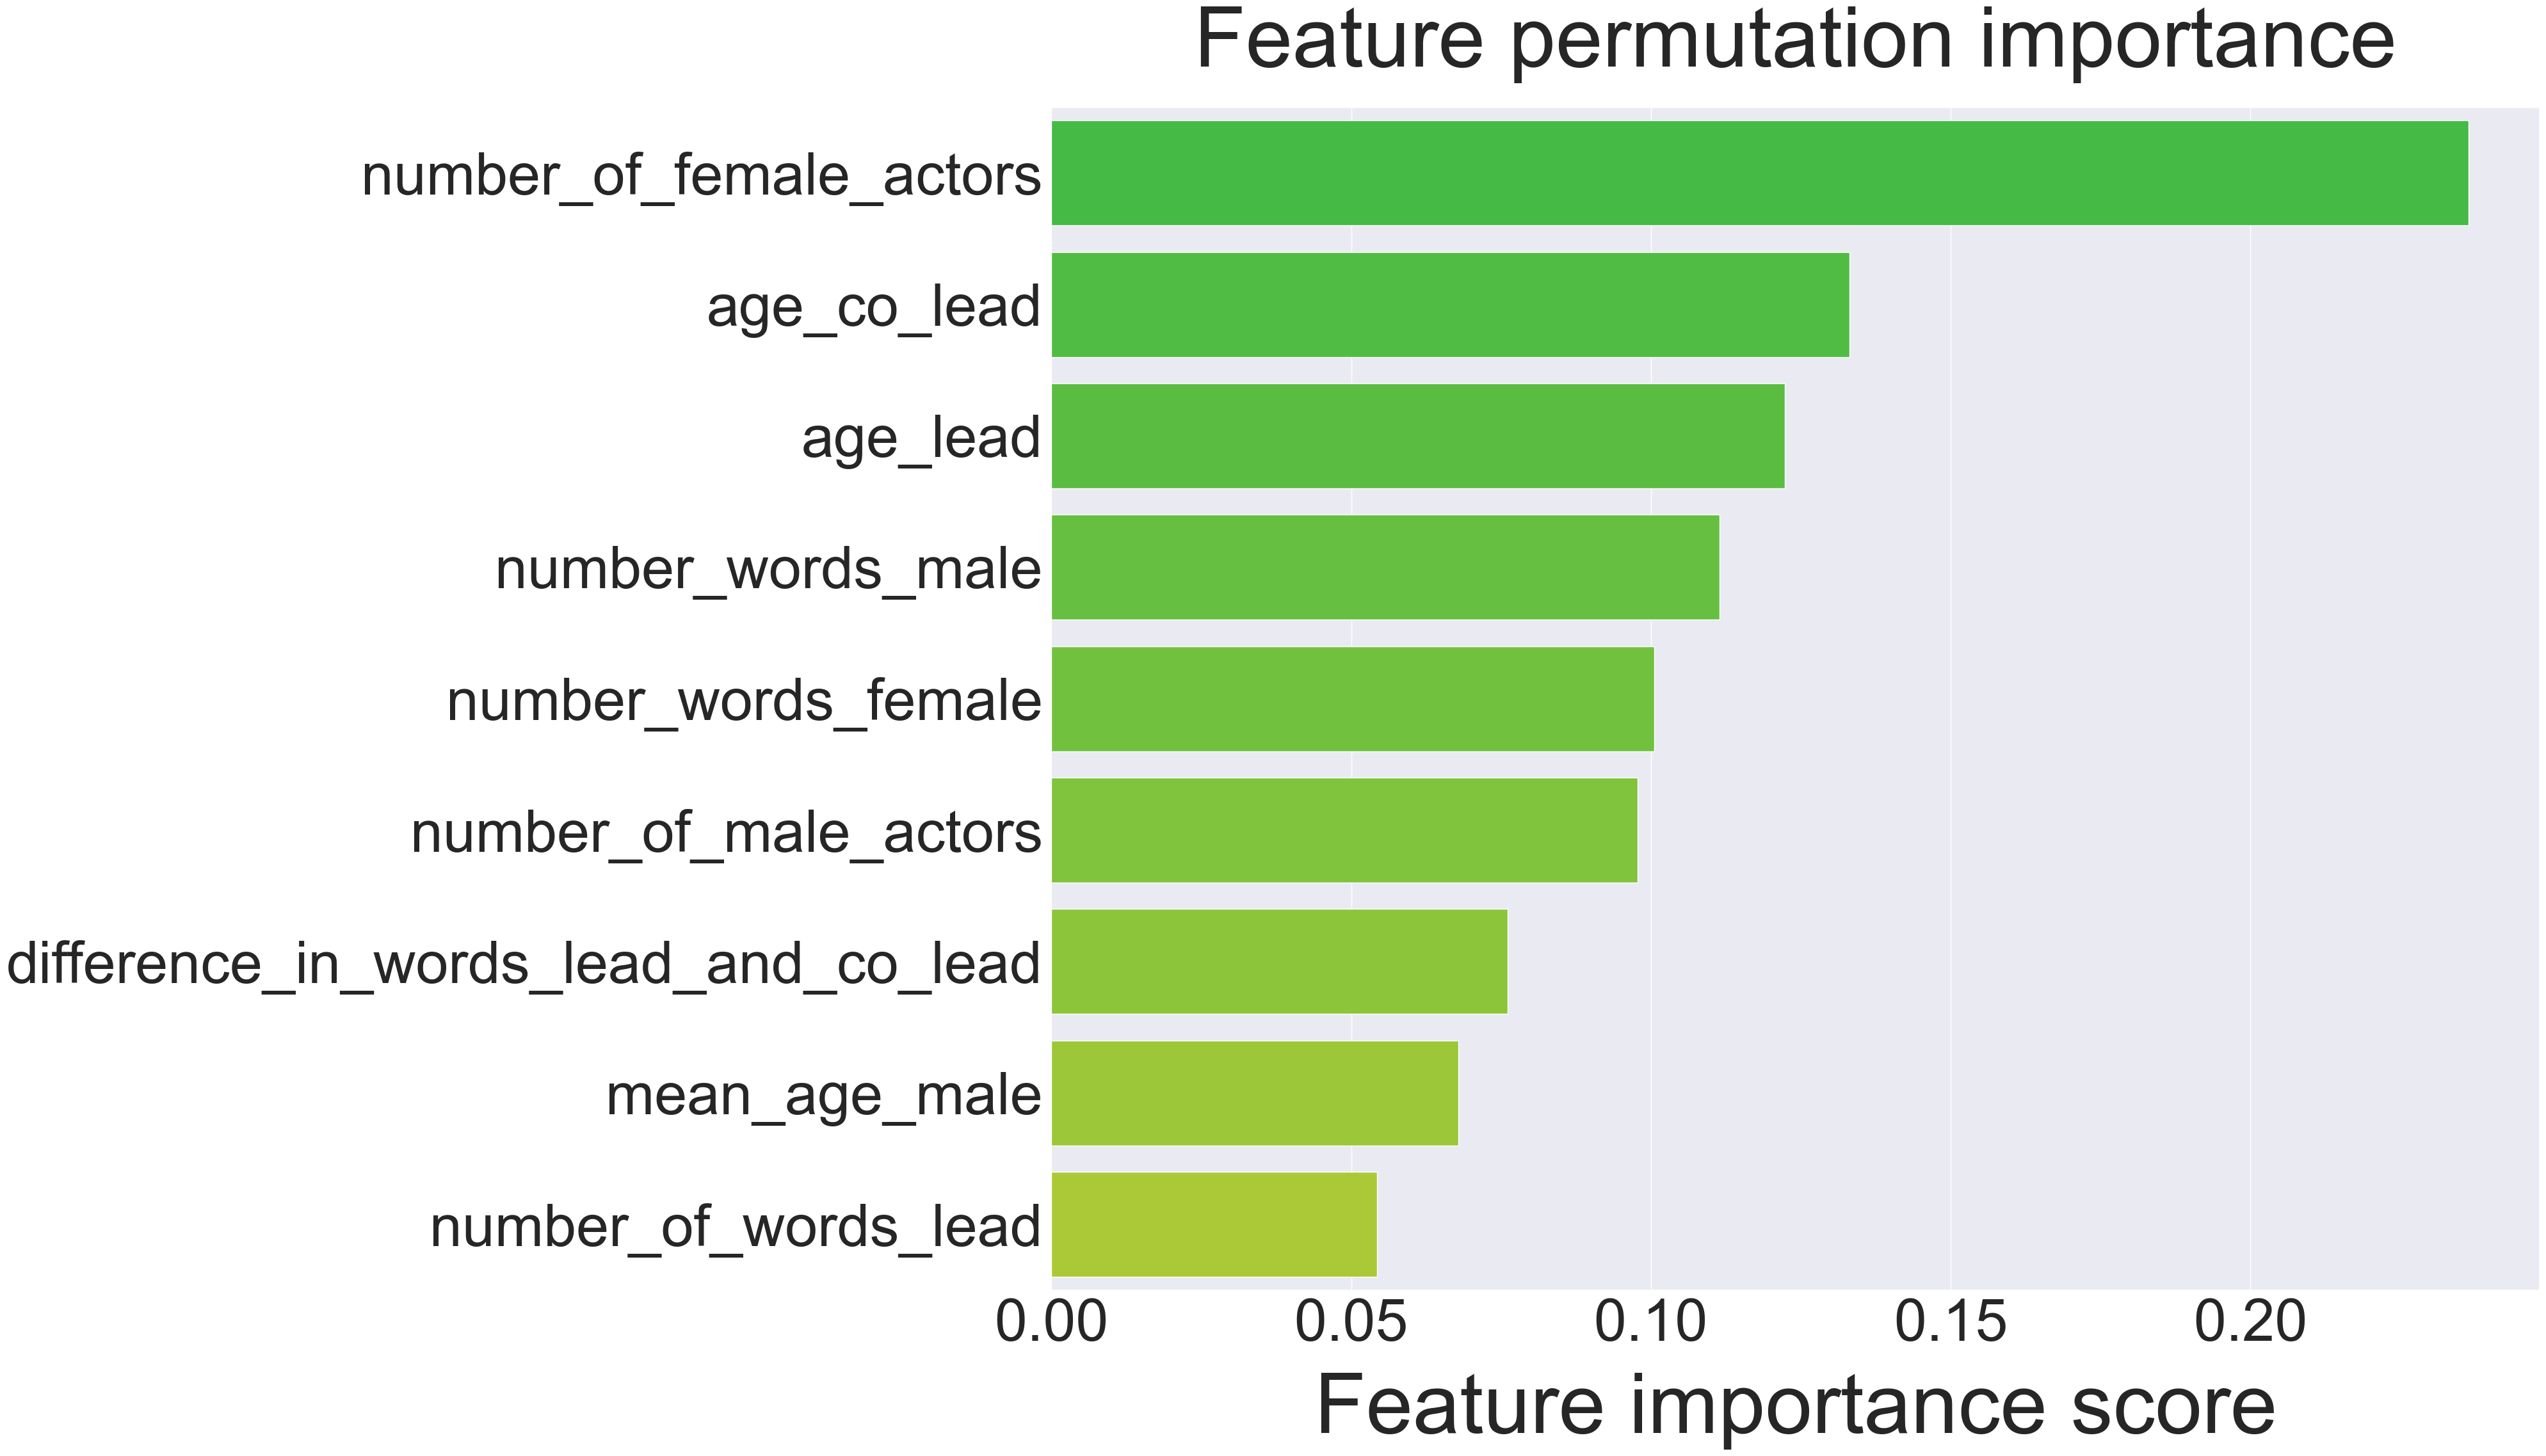

In [6]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
from colour import Color
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(pipe, random_state=1).fit(X_test[selected_features], y_test)

perm_imp = permutation_importance(pipe, X_test[selected_features], y_test)

# View the feature scores as a dataframe to plot them:
feature_permutation_scores = pd.Series(perm_imp.importances_mean, index=X[selected_features].columns).sort_values(ascending=False)
feature_permutation_scores

# Normalise the feature scores to sum 1, so we can compare its relative contribution to the model output change and compare it
# to the Gini importance scores.
normalized_feature_permutation_scores= feature_permutation_scores / sum(feature_permutation_scores)

sns.set(font_scale=6)

limegreen= Color("limegreen")
colors = list(limegreen.range_to(Color("red"),21))
colors = [color.rgb for color in colors]

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=normalized_feature_permutation_scores, y=normalized_feature_permutation_scores.index,palette=colors)
ax.set_title("Feature permutation importance",y=1.03, fontsize=95)
ax.set_xlabel("Feature importance score", fontsize=95)
ax.xaxis.set_label_coords(0.5, -.07)

f.savefig('FeaturePermutation.svg', format='svg', dpi=1200,  bbox_inches='tight', transparent = True)
plt.show()